In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install statsmodels pandas numpy
import statsmodels.api as sm

# Zwite Datensatz:  PO_TSI

## Datenvisualisierung:

In [2]:
#  PO_TSI Datei einlesen:
PO_TSI = pd.read_csv("C:/Users/admin/Desktop/PO/online_dataset_PO_TSI_o2.csv")
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,holiday,release_type,is_release,is_incident
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1.0,Neujahr,NaN,NaN,NaN
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-07,PO,Telesales,TSI,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-09,PO,Telesales,TSI,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-13,PO,Telesales,TSI,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
PO_TSI.shape

(489, 14)

In [4]:
frq=PO_TSI["is_incident"].value_counts(dropna=False)
frq

1.0    324
NaN    165
Name: is_incident, dtype: int64

In [6]:
# Replace NaN values with 0
PO_TSI["is_incident"].fillna(0, inplace=True)

# Convert the values to integers, removing decimals
PO_TSI["is_incident"] = PO_TSI["is_incident"].astype(int)

# Now you can check the value counts again
frq = PO_TSI["is_incident"].value_counts(dropna=False)
print(frq)

1    324
0    165
Name: is_incident, dtype: int64


In [7]:
#Change to datetime:
PO_TSI["date"]= pd.to_datetime(PO_TSI["date"])

# Konvertieren Sie die Spalte "date" in das gewünschte Monat-Jahr-Format und speichern Sie sie in einer neuen Spalte "Monat"
PO_TSI['Monat'] = pd.to_datetime(PO_TSI['date']).dt.to_period('M')

PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,holiday,release_type,is_release,is_incident,Monat
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1.0,Neujahr,NaN,NaN,0,2022-01
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01
2,2022-01-07,PO,Telesales,TSI,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01
3,2022-01-09,PO,Telesales,TSI,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01
4,2022-02-13,PO,Telesales,TSI,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-02


In [8]:
# Replace NaN values with 0
PO_TSI["is_holiday"].fillna(0, inplace=True)

# Convert the values to integers, removing decimals
PO_TSI["is_holiday"] = PO_TSI["is_holiday"].astype(int)

# Now you can check the value counts again
frq = PO_TSI["is_holiday"].value_counts(dropna=False)
print(frq)

0    477
1     12
Name: is_holiday, dtype: int64


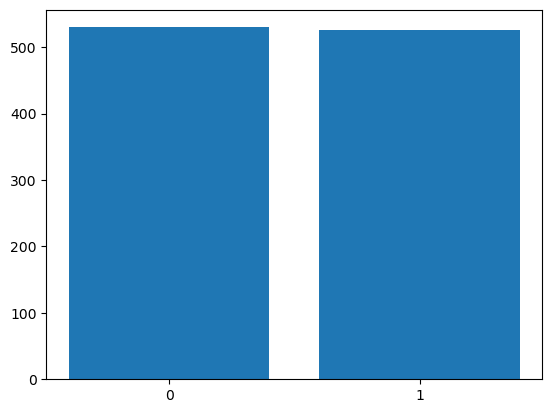

In [9]:
#  Is_incident Plot:

PO_TSI['is_incident'] = PO_TSI['is_incident'].astype(str)

plt.bar(PO_TSI['is_incident'],PO_TSI['sales'])
plt.show()

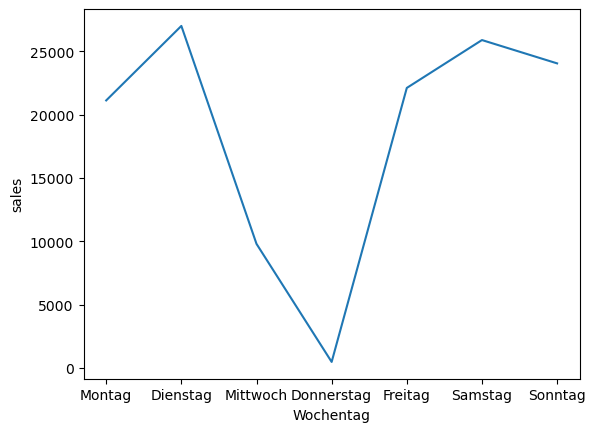

In [10]:
# Extrahiere die Wochentage für jede Zeile in der "Datum"-Spalte
PO_TSI['Wochentag'] = PO_TSI['date'].dt.day_name()

# Gruppieren Sie die Daten nach 'Wochentag' und berechnen Sie die Summe der Verkäufe für jeden Wochentag
Wochentag_group = PO_TSI.groupby('Wochentag')
sales = Wochentag_group['sales'].sum()
Wochentags = [Wochentag for Wochentag, _ in Wochentag_group]

# Plot der Daten
plt.plot(Wochentags, sales)
plt.ylabel('sales')
plt.xlabel('Wochentag')
#plt.xticks(rotation='vertical', size=8)

# Hinzufügen der Wochentagsnamen als X-Achsenbeschriftungen
wochentag_names = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
plt.xticks(Wochentags, wochentag_names)

plt.show()

In [11]:
# Convert the "Monat" to datetime data type if it's not already
PO_TSI['Monat'] = PO_TSI['Monat'].dt.to_timestamp()

PO_TSI['Monat'] = pd.to_datetime(PO_TSI['Monat'])

# Use dt.month to extract the month number and categorize based on month number (1 to 12)
PO_TSI['Month_k'] = PO_TSI['Monat'].dt.month

# Print the DataFrame with the new "Month_k" column
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,holiday,release_type,is_release,is_incident,Monat,Wochentag,Month_k
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1,Neujahr,NaN,NaN,0,2022-01-01,Saturday,1
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2022-01-01,Tuesday,1
2,2022-01-07,PO,Telesales,TSI,235,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2022-01-01,Friday,1
3,2022-01-09,PO,Telesales,TSI,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2022-01-01,Sunday,1
4,2022-02-13,PO,Telesales,TSI,3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2022-02-01,Sunday,2


In [13]:
frq= PO_TSI['Month_k'].value_counts(dropna=False)
frq

3     59
4     58
1     57
2     54
5     48
7     31
8     31
12    31
6     30
9     30
10    30
11    30
Name: Month_k, dtype: int64

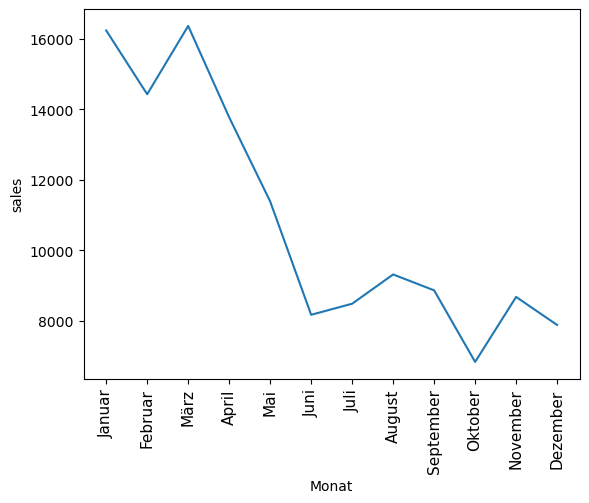

In [14]:
def get_month_name(month_num):
    months = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']
    return months[month_num - 1]  # Monatsnummern sind 1-basiert, daher müssen wir 1 abziehen

Monat_group = PO_TSI.groupby('Month_k')
sales = Monat_group['sales'].sum()
Monats = [get_month_name(month_num) for month_num in sales.index]

plt.plot(Monats, sales)
plt.ylabel('sales')
plt.xlabel('Monat')
plt.xticks(rotation='vertical', size=11)
plt.show()

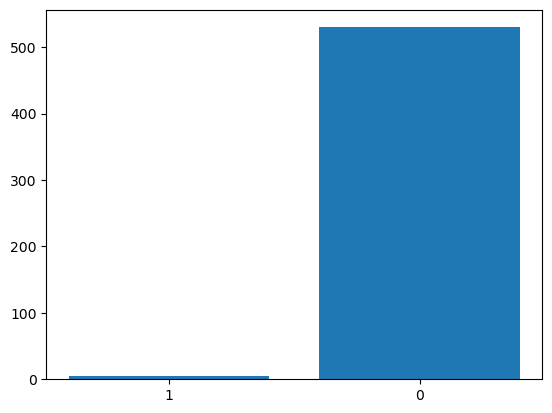

In [15]:
PO_TSI['is_holiday'] = PO_TSI['is_holiday'].astype(str)

plt.bar(PO_TSI['is_holiday'],PO_TSI['sales'])
plt.show()

In [16]:
# Erstellen Sie die Dummy-Variablen für "is_holiday"
holiday_dummies = pd.get_dummies(PO_TSI['is_holiday'], prefix='Holiday', drop_first=True)

# Erstellen Sie die Dummy-Variablen für "is_incident"
incident_dummies = pd.get_dummies(PO_TSI['is_incident'], prefix='Incident', drop_first=True)

# Erstellen Sie die Dummy-Variablen für "Wochentag"
weekday_dummies = pd.get_dummies(PO_TSI['Wochentag'], prefix='Weekdays', drop_first=True)

# Erstellen Sie die Dummy-Variablen für "Month_k"
month_dummies = pd.get_dummies(PO_TSI['Month_k'], prefix='Month', drop_first=True)

# Fügen Sie die Dummy-Variablen dem DataFrame hinzu
PO_TSI = pd.concat([PO_TSI, holiday_dummies, incident_dummies, weekday_dummies, month_dummies], axis=1)

PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-07,PO,Telesales,TSI,235,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-09,PO,Telesales,TSI,2,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-02-13,PO,Telesales,TSI,3,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
PO_TSI.columns

Index(['date', 'product_category', 'reseller_name', 'reseller', 'sales',
       'incident_start_date', 'incident_end_date', 'incident_type',
       'incident_days', 'is_holiday', 'holiday', 'release_type', 'is_release',
       'is_incident', 'Monat', 'Wochentag', 'Month_k', 'Holiday_1',
       'Incident_1', 'Weekdays_Monday', 'Weekdays_Saturday', 'Weekdays_Sunday',
       'Weekdays_Thursday', 'Weekdays_Tuesday', 'Weekdays_Wednesday',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [18]:
# Daten PO_TSI speichern:
PO_TSI.to_csv("PO_TSI.csv", index = None)

In [19]:
# Daten PO_TSI einlesen:
PO_TSI=pd.read_csv("PO_TSI.csv")
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-07,PO,Telesales,TSI,235,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-09,PO,Telesales,TSI,2,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-02-13,PO,Telesales,TSI,3,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


# Regression: 

In [20]:
# Definiere die unabhängigen Variablen (X) und die abhängige Variable (y)
X = PO_TSI[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Sunday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  
y = PO_TSI['sales']

# Füge eine Konstante hinzu, um den Intercept zu berücksichtigen
X = sm.add_constant(X)

# Erstelle und fitte das Regressionsmodell
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     144.2
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          5.55e-182
Time:                        11:00:22   Log-Likelihood:                -2639.8
No. Observations:                 489   AIC:                             5320.
Df Residuals:                     469   BIC:                             5404.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                310.3956     10

# ARIMA:

In [21]:
# Definiere die endogene (abhängige) Variable (sales) und die exogenen Variablen 
exogene_variable= PO_TSI[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Sunday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  
endogene_variable = PO_TSI['sales']



#exogene_variable = sm.add_constant(exogene_variable)  

# Erstelle das ARIMA-Modell mit exogenen Variablen
model = sm.tsa.ARIMA(endog=endogene_variable, exog=exogene_variable, order=(1, 0, 0))  # AR-Ordnung = 1, MA-Ordnung = 0, Differenzierung = 0

# Führe das Modell auf den Daten ein
results = model.fit()

# Zeige die Ergebnisse der Modellanpassung an
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  489
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2631.868
Date:                Fri, 21 Jul 2023   AIC                           5307.736
Time:                        11:00:45   BIC                           5399.968
Sample:                             0   HQIC                          5343.962
                                - 489                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                310.9789     11.282     27.563      0.000     288.866     333.092
Holiday_1           -278.5822      9.734    -28.619      0.000    -297.661    -259.504
Incident_1          

# ARIMAX:

In [22]:
exog= PO_TSI[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Sunday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  
endog= PO_TSI['sales']

# Create the ARIMA model with AR order = 1 and MA order = 0 and provide exogenous variables
order = (1, 0, 0)  # AR order = 1, MA order = 0
model = sm.tsa.ARIMA(endog, exog, order=order)

# Fit the model to the data
results = model.fit()

# Display the results
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  489
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2631.868
Date:                Fri, 21 Jul 2023   AIC                           5307.736
Time:                        11:01:10   BIC                           5399.968
Sample:                             0   HQIC                          5343.962
                                - 489                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                310.9789     11.282     27.563      0.000     288.866     333.092
Holiday_1           -278.5822      9.734    -28.619      0.000    -297.661    -259.504
Incident_1          

# Prognose:

In [23]:
# Define the exogenous features for forecasting
exogenous_features= PO_TSI[['Holiday_1', 'Incident_1', 
             'Weekdays_Monday','Weekdays_Saturday','Weekdays_Sunday','Weekdays_Thursday','Weekdays_Tuesday','Weekdays_Wednesday',
             'Month_2', 'Month_3', 'Month_4', 'Month_5','Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11','Month_12' ]]  

# Generate the forecast for the entire data period
forecast = results.predict(exog=exogenous_features)

# Add the forecasted values to the DataFrame
PO_TSI["Forecast_ARIMAX"] = forecast

# Print the DataFrame with the forecasted values
PO_TSI.head()

,date,product_category,reseller_name,reseller,sales,incident_start_date,incident_end_date,incident_type,incident_days,is_holiday,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Forecast_ARIMAX
0,2022-01-01,PO,Telesales,TSI,1,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,-129.220065
1,2022-01-04,PO,Telesales,TSI,372,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,392.242929
2,2022-01-07,PO,Telesales,TSI,235,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,311.672713
3,2022-01-09,PO,Telesales,TSI,2,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,9.991877
4,2022-02-13,PO,Telesales,TSI,3,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,7.249966


<AxesSubplot:>

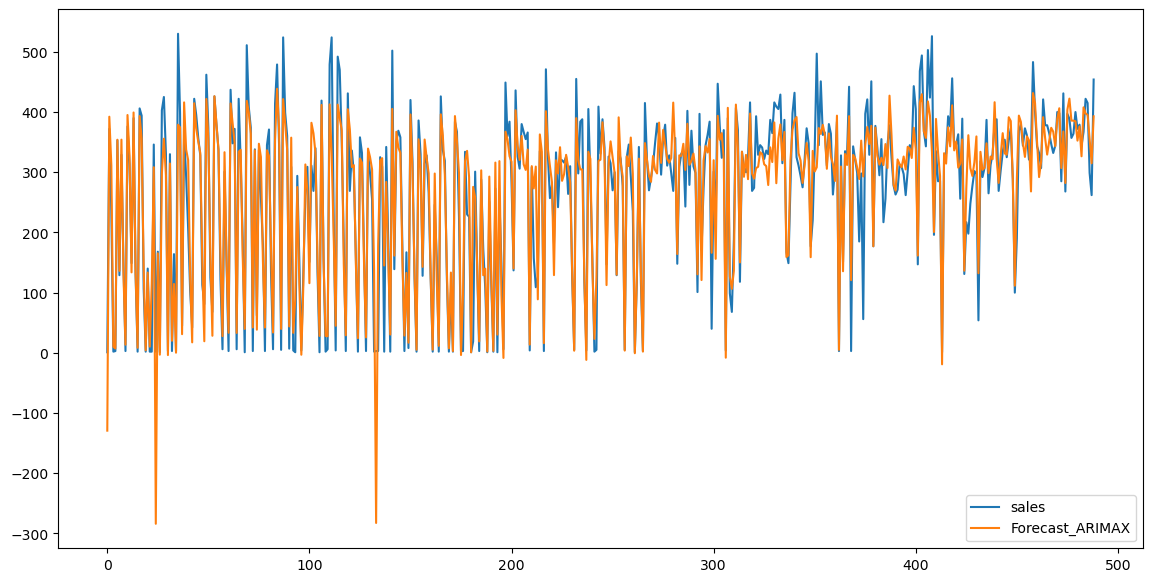

In [24]:
PO_TSI[["sales", "Forecast_ARIMAX"]].plot(figsize=(14, 7))